In [1]:
# подготавливаем данные и pandas для работы

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Olympics.csv', skiprows=4)

## Task 10.1

In [40]:
# только США
USA = df[df.NOC == 'USA']
USA = USA.groupby(['Edition'])['Athlete'].agg(lambda x:
                                              x.value_counts().index[0]).to_frame()
USA = USA.reset_index()

# добавляем атлету его дисциплину
Discipline = []
i = 0
while i < len(USA.Edition.values - 1):
    discipline = df.Discipline[(df.Athlete == USA.Athlete.values[i])
                              & (df.Edition == USA.Edition.values[i])].values[0]
    Discipline.append(discipline)
    i += 1
USA['Discipline'] = Discipline

# считаем число золота в том году 
Golds = []
i = 0
while i < len(USA.Edition.values - 1):
    gold_count = len(df['Medal'][(df.Athlete == USA.Athlete.values[i] ) 
                                 & (df.Edition == USA.Edition.values[i]) 
                                 & (df.Medal == 'Gold')])
    Golds.append(gold_count)
    i += 1
USA['Gold'] = Golds

# число серебра
Silvers = []
i = 0
while i < len(USA.Edition.values - 1):
    silver_count = len(df['Medal'][(df.Athlete == USA.Athlete.values[i] ) 
                                   & (df.Edition == USA.Edition.values[i]) 
                                   & (df.Medal == 'Silver')])
    Silvers.append(silver_count)
    i += 1
USA['Silver'] = Silvers

# число бронзы
Bronzes = []
i = 0
while i < len(USA.Edition.values - 1):
    bronze_count = len(df['Medal'][(df.Athlete == USA.Athlete.values[i] ) 
                                   & (df.Edition == USA.Edition.values[i]) 
                                   & (df.Medal == 'Bronze')])
    Bronzes.append(bronze_count)
    i += 1
USA['Bronze'] = Bronzes

# всего медалей
Total = []
i = 0
while i < len(USA.Edition.values - 1):
    total_count = USA.Gold.values[i] 
    + USA.Silver.values[i] 
    + USA.Bronze.values[i]
    
    Total.append(total_count)
    i += 1
USA['Total'] = Total

# создаем idx колонку и ставим ее в начале
USA['idx'] = USA.index
cols = USA.columns.tolist()
cols = cols[-1:] + cols[:-1]
USA = USA[cols]

In [41]:
USA

,idx,Edition,Athlete,Discipline,Gold,Silver,Bronze,Total
0,0,1896,"GARRETT, Robert",Athletics,2,2,0,2
1,1,1900,"TEWKSBURY, Walter B. John",Athletics,2,2,1,2
2,2,1904,"EYSER, George",Artistic G.,3,2,1,3
3,3,1908,"SHEPPARD, Melvin",Athletics,3,0,0,3
4,4,1912,"OSBURN, Carl Townsend",Shooting,1,2,1,1
5,5,1920,"LEE, Willis",Shooting,5,1,1,5
6,6,1924,"WEISSMULLER, Johnny",Swimming,3,0,1,3
7,7,1928,"OSIPOWICH, Albina Lucy",Swimming,2,0,0,2
8,8,1932,"MADISON, Helene",Swimming,3,0,0,3
9,9,1936,"OWENS, Jesse",Athletics,4,0,0,4


## Task 10.2

In [42]:
# где он получил медали

won = df.Event[df.Athlete == 'OWENS, Jesse']
for event in range(0, len(won)):
    print(won.values[event])

100m
200m
4x100m relay
long jump


In [43]:
badminton = df[(df.Gender == 'Men') 
         & (df.Medal == 'Gold') 
         & (df.Discipline == 'Badminton')]
# кто получил большинство медалей (INA)
print(badminton.NOC.value_counts().nlargest(1).index[0],
      badminton.NOC.value_counts().nlargest(1).values[0])

# берем только эту страну и сортируем по атлетам
df2 = badminton[df.NOC == 
                badminton.NOC.value_counts().nlargest(1).index[0]]
df2.sort_values(by = 'Athlete')

INA 8


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
20045,Barcelona,1992,Badminton,Badminton,"BUDI KUSUMA, Alan",INA,Men,singles,M,Gold
23701,Sydney,2000,Badminton,Badminton,"GUNAWAN, Tony",INA,Men,doubles,M,Gold
25734,Athens,2004,Badminton,Badminton,"HIDAYAT, Taufik",INA,Men,singles,M,Gold
27725,Beijing,2008,Badminton,Badminton,"KIDO, Markis",INA,Men,doubles,M,Gold
21771,Atlanta,1996,Badminton,Badminton,"MAINAKY, Rexy Ronald",INA,Men,doubles,M,Gold
27726,Beijing,2008,Badminton,Badminton,"SETIAWAN, Hendra",INA,Men,doubles,M,Gold
21772,Atlanta,1996,Badminton,Badminton,"SUBAGJA, Ricky Achmad",INA,Men,doubles,M,Gold
23702,Sydney,2000,Badminton,Badminton,"WIJAYA, Candra",INA,Men,doubles,M,Gold


In [2]:
# 3 страны, которые выиграли большинство медалей
top_countries = df[(df.Edition >= 1984) & (df.Edition <= 2008)]
top_3 = top_countries.NOC.value_counts().nlargest(3)
for i, j in zip(top_3.index, top_3.values):
        print(i, j)

USA 1837
AUS 762
GER 691


In [45]:
# мужчины-медалисты на 100м
men_gold_100m = df[(df.Gender == 'Men') & (df.Medal == 'Gold') & (df.Event == '100m')]
men_gold_100m = men_gold_100m[['City','Edition', 'Athlete', 'NOC']]
men_gold_100m.sort_values(by = 'Edition', ascending = False)

,City,Edition,Athlete,NOC
27552,Beijing,2008,"BOLT, Usain",JAM
25539,Athens,2004,"GATLIN, Justin",USA
23521,Sydney,2000,"GREENE, Maurice",USA
21598,Atlanta,1996,"BAILEY, Donovan",CAN
19859,Barcelona,1992,"CHRISTIE, Linford",GBR
18284,Seoul,1988,"LEWIS, Carl",USA
16794,Los Angeles,1984,"LEWIS, Carl",USA
15374,Moscow,1980,"WELLS, Allan",GBR
14069,Montreal,1976,"CRAWFORD, Hasely",TRI
12902,Munich,1972,"BORZOV, Valery",URS


## Task 10.3

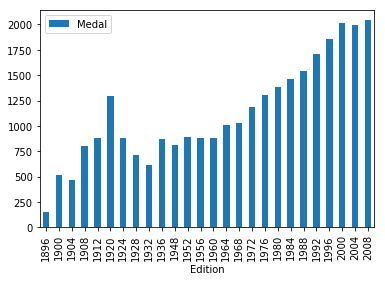

In [46]:
# число медалей на каждой олимпиаде
graphic = df.groupby('Edition').agg({'Medal':'count'})
graphic.plot(kind='bar')

In [47]:
# число и года медалей для каждой страны
country = df.groupby('NOC').agg({'Edition':['min', 'max', 'count']})
country.columns = ["_".join(x) for x in country.columns.ravel()]
country.columns = ['first_year', 'last_year', 'medals_count']
country.sort_values(by = 'medals_count', ascending = False)

,first_year,last_year,medals_count
NOC,,,
USA,1896,2008,4335
URS,1952,1988,2049
GBR,1896,2008,1594
FRA,1896,2008,1314
ITA,1900,2008,1228
GER,1896,2008,1211
AUS,1896,2008,1075
HUN,1896,2008,1053
SWE,1900,2008,1021


## Task 10.4

In [48]:
# берем только USA, золотые медали в атлетике
medals = df[(df.NOC == 'USA') & (df.Medal == 'Gold') & (df.Sport == 'Athletics')]
medals = medals[['Sport','Gender','Medal','Edition']]

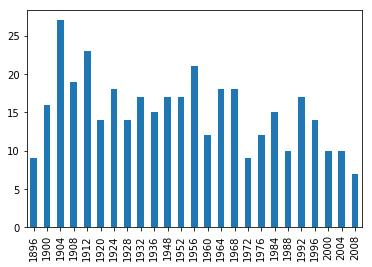

In [49]:
# для мужчин
# если хотим по убыванию, то value_counts(sort = True)
medals[medals.Gender == 'Men'].Edition.value_counts(sort = False).plot(kind='bar')

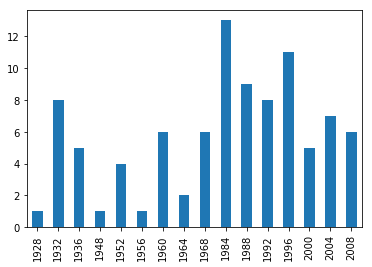

In [50]:
# для женщин
medals[medals.Gender == 'Women'].Edition.value_counts(sort = False).plot(kind='bar')

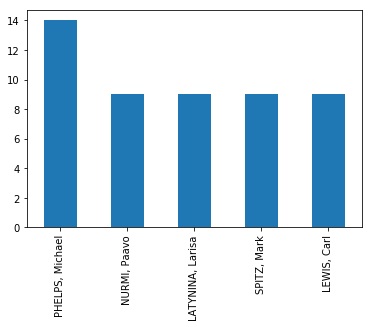

In [51]:
# топ 5 атлетов по золотым медалям
df[df.Medal == 'Gold'].Athlete.value_counts().nlargest(5).plot(kind = 'bar')